#### Prerequisites 

**Note:** Before your the cells below, make sure to choose Python 3 (TensorFlow 2.3 Python 3.7 CPU Optimized)

#### Imports 

In [1]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

plt.rcParams['figure.figsize'] = (20, 10)

In [2]:
import bbox_visualizer as bbv
import logging
import boto3
import json
import cv2

##### Setup logger

In [3]:
logger = logging.getLogger('__name__')
logger.setLevel(logging.DEBUG)
logger.addHandler(logging.StreamHandler())

#### Essentials 

In [4]:
ENDPOINT_NAME = 'jumpstart-ftc-mx-od-ssd-512-mobilenet1-0-coco'  # REPLACE THIS WITH YOUR ENDPOINT AFTER DEPLOYING THE FINE-TUNED OBJECT DETECTION MODEL
sagemaker = boto3.client('runtime.sagemaker')
confidence_threshold = 0.9  # 90 %

### Make predictions by invoking SageMaker endpoint

[[0, 0, 0, 0]]


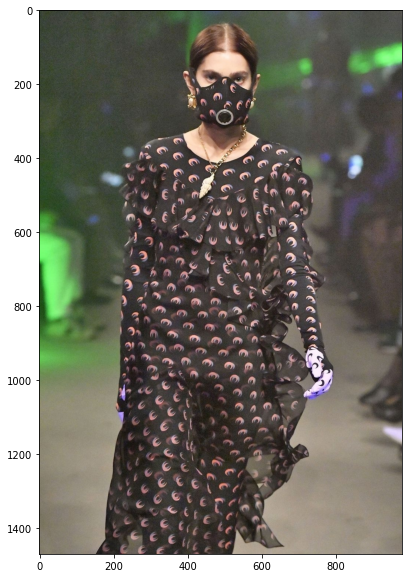

[[0, 0, 0, 1], [0, 0, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 0]]


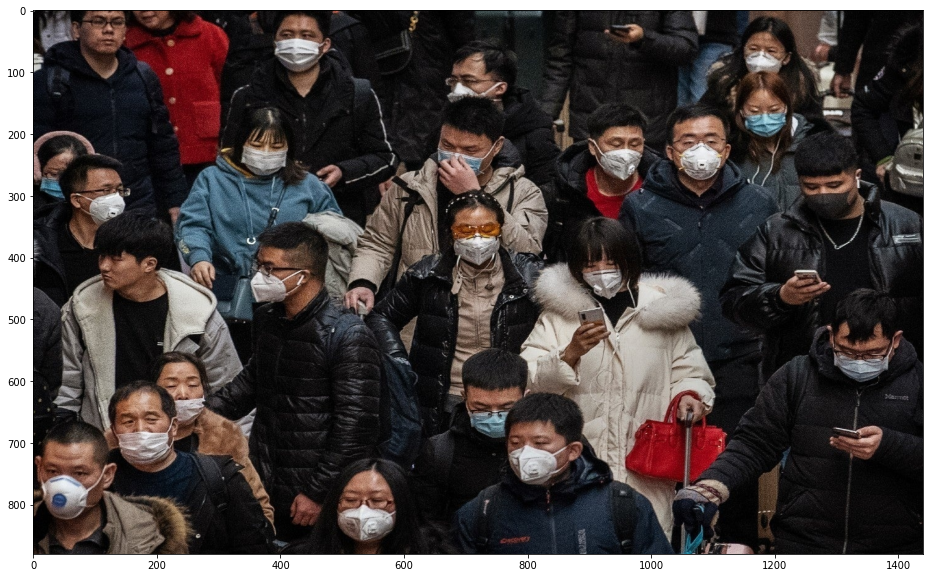

[]


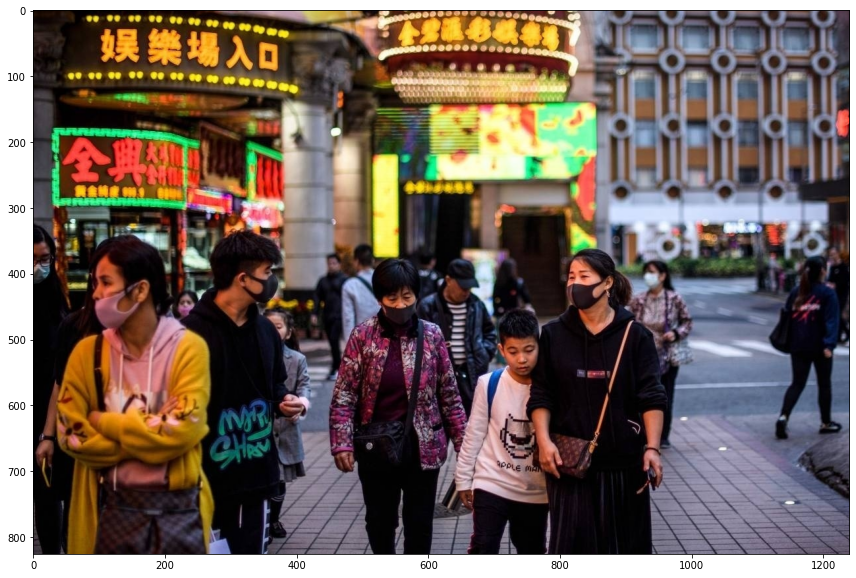

[[0, 0, 0, 0]]


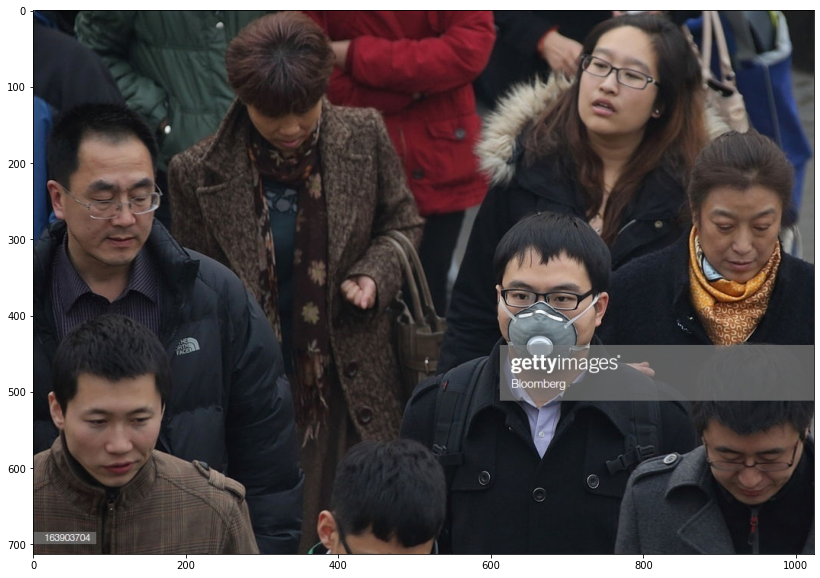

[[0, 0, 0, 0]]


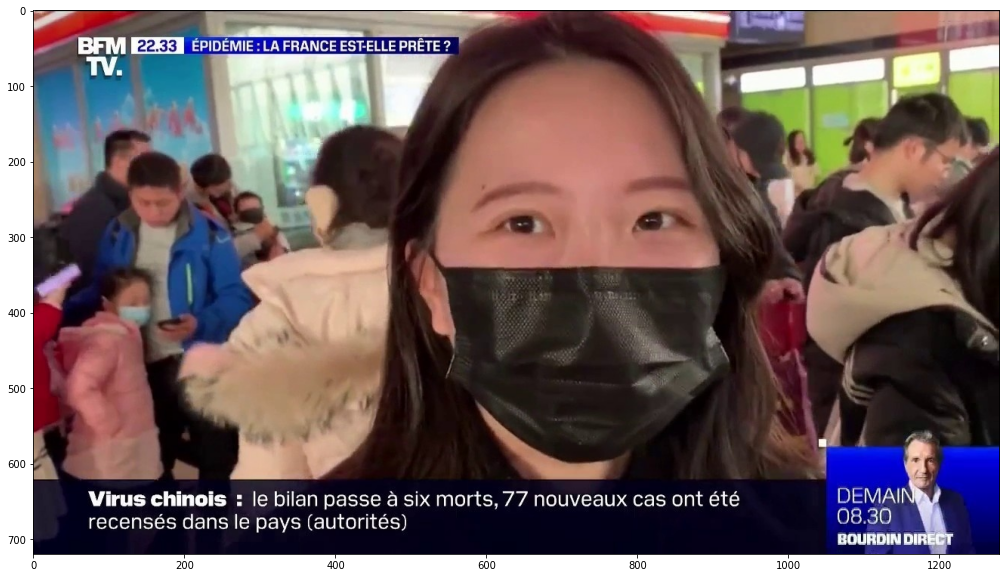

[[0, 0, 0, 0], [0, 0, 1, 0]]


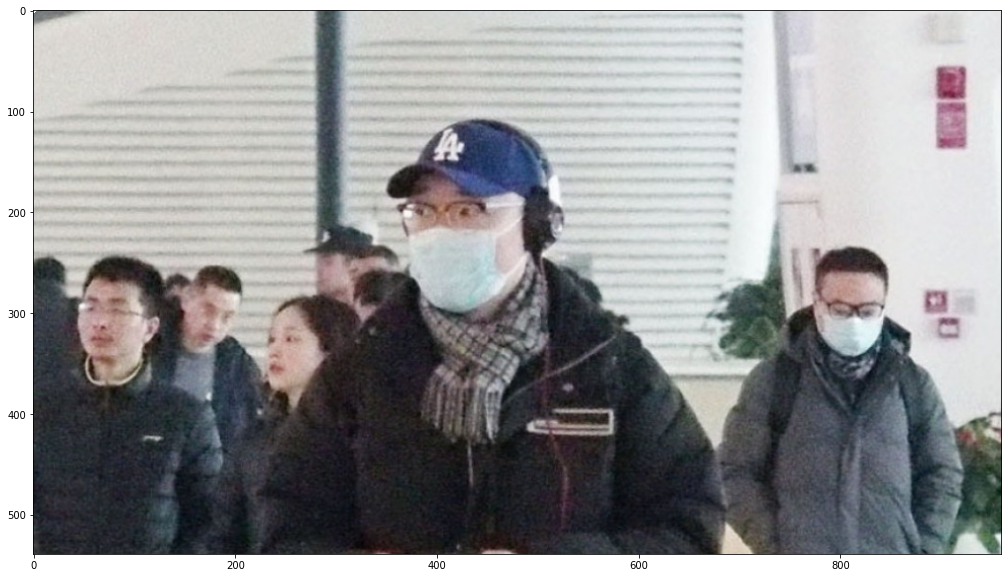

[[0, 0, 0, 0]]


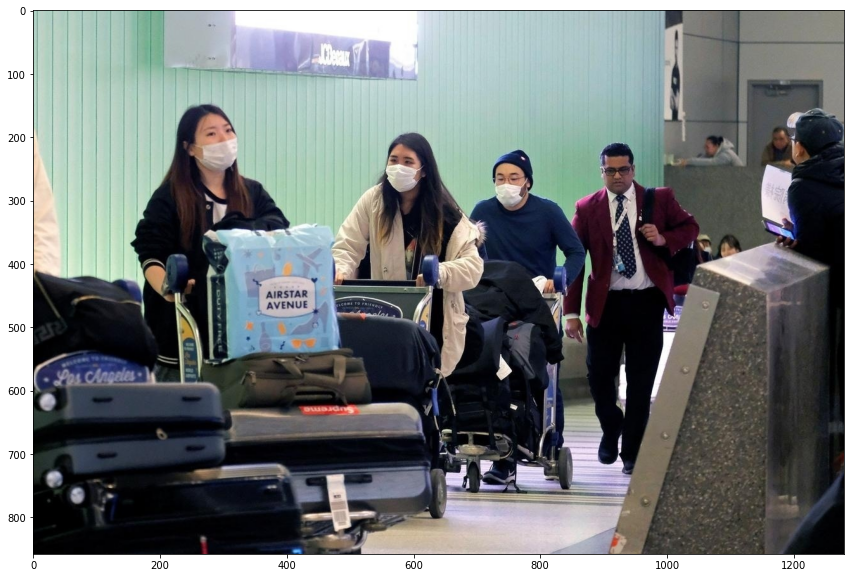

[[0, 0, 0, 0]]


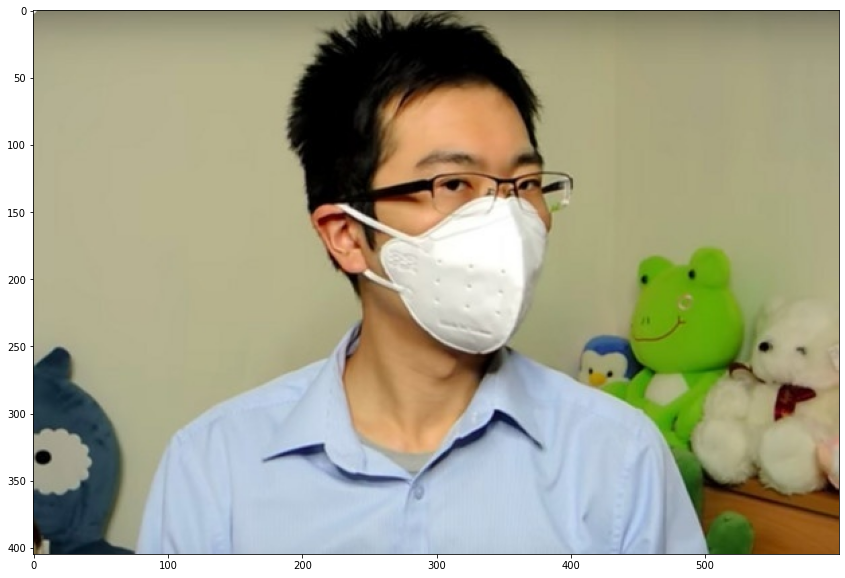

[[0, 0, 0, 0], [0, 0, 1, 0]]


KeyboardInterrupt: 

In [6]:
for i in range(1, 101):
    with open(f'./data/images/{i}.png', 'rb') as f: 
        image_bytes = f.read()
        image = cv2.imread(f'./data/images/{i}.png')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        dh, dw, _ = image.shape
        response = sagemaker.invoke_endpoint(EndpointName=ENDPOINT_NAME, 
                                             ContentType='application/x-image', 
                                             Body=image_bytes)
        bboxes, classes, confidences = json.loads(response['Body'].read())
        filtered_bboxes = []
        for j, confidence in enumerate(confidences):
            if confidence > 0.9:
                x, y, w, h = bboxes[j]
                
                l = int((x - w / 2) * dw)
                r = int((x + w / 2) * dw)
                t = int((y - h / 2) * dh)
                b = int((y + h / 2) * dh)

                if l < 0:
                    l = 0
                if r > dw - 1:
                    r = dw - 1
                if t < 0:
                    t = 0
                if b > dh - 1:
                    b = dh - 1
                    
                x1, x2, y1, y2 = l, r, t, b
                
                filtered_bboxes.append([x1, y1, x2, y2])
        print(filtered_bboxes)
        image = bbv.draw_multiple_rectangles(image, filtered_bboxes)
        plt.imshow(image)
        plt.show()
        if i == 99:
            break
        
        
    